In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('Study_vs_Score_data.csv')

# Select relevant columns
df.head(5)

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  1000 non-null   float64
 1   Final_Marks       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
df.describe()

,Attendance_Hours,Final_Marks
count,1000.000000,1000.000000
mean,44.317959,62.653458
std,20.449615,11.152260
min,10.324242,34.870813
25%,26.518129,53.755843
50%,44.776516,62.844569
75%,62.102371,71.520120
max,79.980237,91.061859


In [6]:
df.isnull().sum()

Attendance_Hours    0
Final_Marks         0
dtype: int64

In [7]:
# === 2. Prepare data ===
X = df[['Attendance_Hours']].values  # Needs to be 2D for sklearn
y = df['Final_Marks'].values

# === 3. Fit linear regression ===
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# === 4. Extract parameters ===
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}, Slope: {slope}")


Intercept: 40.984462123219316, Slope: 0.48894391692461825


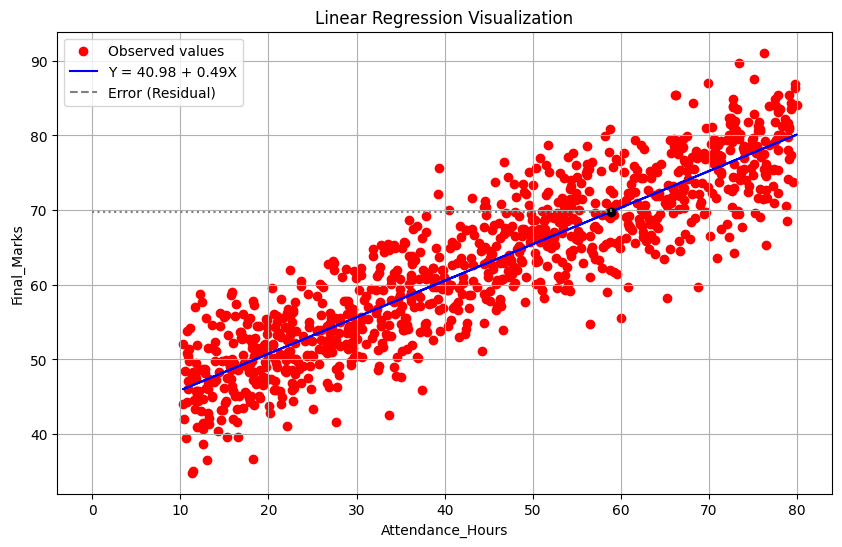

In [12]:
# === 5. Plot ===
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X, y, color='red', label='Observed values')

# Regression line
plt.plot(X, y_pred, color='blue', label=f'Y = {intercept:.2f} + {slope:.2f}X')

# Pick a point to annotate
i = len(X) // 2
plt.plot(X[i], y_pred[i], 'ko')  # Predicted point
plt.vlines(X[i], y_pred[i], y[i], color='gray', linestyles='dashed', label='Error (Residual)')
plt.hlines(y_pred[i], 0, X[i], color='gray', linestyles='dotted')

# Labels and annotations
plt.xlabel('Attendance_Hours')
plt.ylabel('Final_Marks')
plt.title('Linear Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24.37419704448645
R-squared: 0.8038270709726949


Residuals: [ 3.04469979e-01 -6.81484074e+00  1.59359697e+00  2.64234469e+00
  2.04579780e+00  4.65073052e+00  3.34066189e+00  2.09235518e+00
 -7.59511424e-01 -8.63071031e+00  1.29012067e+00  9.15175416e-01
  1.12824174e+00 -7.09330945e+00 -6.13846496e+00  4.53380446e+00
 -8.36216136e-01  2.93972474e+00 -3.98016011e-01 -4.99730845e-01
  4.29104649e+00 -3.34616703e+00 -1.67199122e-01 -2.90174085e+00
 -2.69341810e+00 -1.81209396e+00  3.91300260e-01 -2.86966509e+00
  5.86336426e+00 -5.31098863e+00 -1.33806487e+00 -2.94058356e+00
  6.41133324e+00  8.43239603e-01  5.03264896e+00 -7.67606358e+00
  6.97098497e-01  3.64984366e+00  6.70642568e-02  4.79414596e+00
 -3.36589500e+00  6.55606610e+00  1.06472035e+01 -1.98434756e+00
 -2.90113739e+00  6.90576419e+00  7.26520068e+00 -3.08570736e+00
 -2.55172218e+00 -2.13976070e+00 -6.84576727e+00 -4.86726572e+00
 -5.16750264e+00 -4.02035913e+00 -5.84595501e-01  1.01063464e+00
  6.94708780e+00 -5.71399530e+00  4.08271327e+00 -1.69206397e+00
 -8.20412452e-

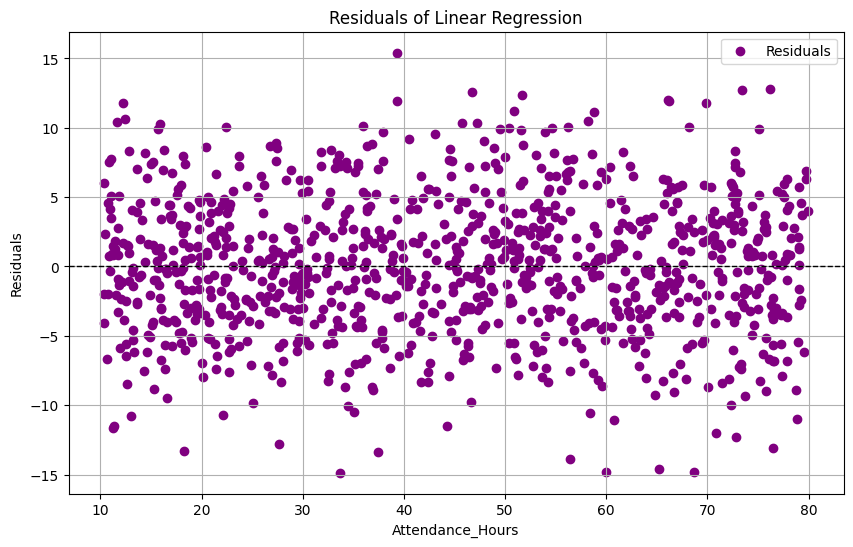

In [17]:
#calculate the residuals
residuals = y - y_pred
print("Residuals:", residuals)
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='purple', label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Attendance_Hours')
plt.ylabel('Residuals')
plt.title('Residuals of Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#Evaluation 
How to identify the model is good fit

% of y explained by x tells use how good the model is and Rsquared value should be closer to 1. 
MSE - Averaged squared errors are better when it is lower
Resudials should be randomly scattered

## Mean Squared Error: 24.37419704448645
## R-squared: 0.8038270709726949

#### R-squared value is 0.8038, which indicates that approximately 80.38% of the variance in the final marks can be explained by the attendance hours. This suggests a strong linear relationship between the two variables.
#### - Mean Squared Error (MSE) is 24.3742, which indicates the average of the squared differences between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

### Evaluation metrics help us measure the performance of a model and guide model selection and improvement.

MSE (Mean Squared Error) quantifies the accuracy of a model’s predictions by averaging the squared differences between actual and predicted values. It is sensitive to outliers, as large errors contribute significantly to the overall score.

MAE (Mean Absolute Error) is another evaluation metric that measures the average absolute difference between predicted and actual values, providing a straightforward interpretation of prediction error.

RMSE (Root Mean Squared Error) is the square root of MSE. While it is in the same units as the target variable, it is not a normalized measure and can fluctuate when the units of the variables vary. RMSE is generally less informative than R-squared for assessing model fit.

R-squared (Coefficient of Determination) indicates the proportion of variance in the dependent variable that is explained by the independent variable(s). It ranges from 0 to 1, with higher values indicating a better fit.

Adjusted R-squared adjusts the R-squared value for the number of predictors in the model, penalizing the addition of predictors that do not improve the model significantly. 
Adjusted R-square helps to prevent overfitting. It penalizes the model with additional predictors that do not contribute significantly to explain the variance in the dependent variable.



------------------------------

### Analysis

The linear regression model fitted to predict `Final_Marks` based on `Attendance_Hours` yields a slope of approximately **0.49**. This means that for each additional hour of attendance, the model predicts an increase of about 0.49 marks in the final score.

The predicted values (`y_pred`) closely follow the actual values (`y`), as indicated by the high R-squared value (see previous cells). The residuals (differences between actual and predicted values) are generally small and randomly scattered, suggesting that the linear model is appropriate for this data.

**Interpretation:**
- **Slope:** A positive slope indicates a direct relationship between attendance and final marks.
- **Goodness of Fit:** The R-squared value (previously calculated) shows that a significant portion of the variance in final marks is explained by attendance hours.
- **Residuals:** The random scatter of residuals (see residual plot) suggests no major patterns are left unexplained, indicating the model does not suffer from major bias or misspecification.

**Conclusion:**  
The model demonstrates that attendance is a strong predictor of final marks, and the linear relationship is a good fit for the data.

## Learning Regularization

Regularization is a model correction technique. It adds bias (a restriction) to the model to avoid overfitting — the scenario where your model performs great on training data but poorly on unseen data. It helps in improving that performance by addressing overfitting and enhancing generalization. 

### Types of Regularization Models

- **Lasso Regression (L1 Regularization):** Adds a penalty equal to the absolute value of the magnitude of coefficients. It can shrink some coefficients to zero, effectively performing feature selection.
- **Ridge Regression (L2 Regularization):** Adds a penalty equal to the square of the magnitude of coefficients. It shrinks coefficients but does not set them to zero.
- **Elastic Net Regression:** Combines both L1 and L2 penalties. Useful when there are multiple correlated features.



/Users/vijiashok/Documents/vscode_projects/phd_practice_lab/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/vijiashok/Documents/vscode_projects/phd_practice_lab/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/vijiashok/Documents/vscode_projects/phd_practice_lab/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


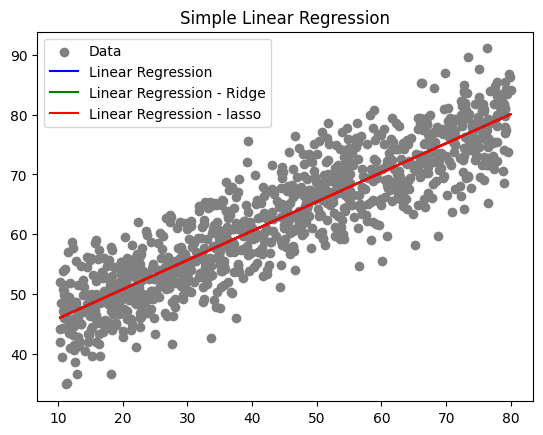

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Models
lin_reg1 = LinearRegression()
ridge_reg1 = Ridge(alpha=1.0)   # L2 regularization
lasso_reg1 = Lasso(alpha=0.1)   # L1 regularization

X = df[['Attendance_Hours']].values  # Needs to be 2D for sklearn
y = df['Final_Marks'].values

# Fit
lin_reg1.fit(X, y)
ridge_reg1.fit(X, y)
lasso_reg1.fit(X, y)


# Predictions
y_pred_lr_0 = lin_reg1.predict(X)
y_pred_ridge_0 = ridge_reg1.predict(X)
y_pred_lasso_0 = lasso_reg1.predict(X)

# Plot
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred_lr_0, label='Linear Regression', color='blue')
plt.title('Simple Linear Regression')
plt.show()


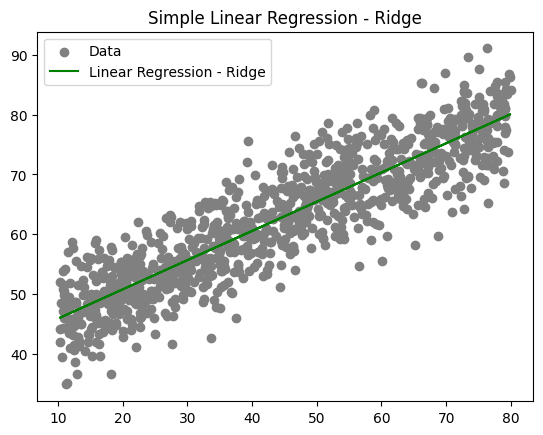

In [44]:
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred_ridge_0, label='Linear Regression - Ridge', color='green')
plt.legend()
plt.title('Simple Linear Regression - Ridge')
plt.show()

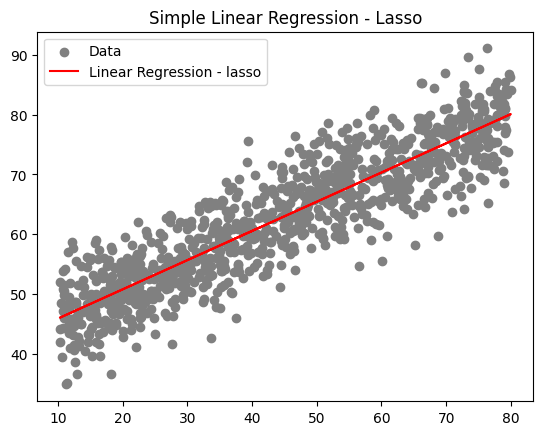

In [45]:
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred_lasso_0, label='Linear Regression - lasso', color='red')
plt.legend()
plt.title('Simple Linear Regression - Lasso')
plt.show()

In [46]:
mse = mean_squared_error(y, y_pred_lr_0)
r2 = r2_score(y, y_pred_lr_0)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.37419704448645
R-squared: 0.8038270709726949


In [47]:
mse = mean_squared_error(y, y_pred_ridge_0)
r2 = r2_score(y, y_pred_lr_0)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.37419704505869
R-squared: 0.8038270709726949


In [48]:
mse = mean_squared_error(y, y_pred_lasso_0)
r2 = r2_score(y, y_pred_lr_0)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.374220981183615
R-squared: 0.8038270709726949


### Ridge Regression Predictions 

The predictions from Ridge regression (`y_pred_ridge` or `y_pred_ridge_0`) are already very close to the actual values, as shown by the high R² score. This indicates that the linear relationship between attendance hours and final marks is well captured by the model with L2 regularization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Use your data
X = df[['Attendance_Hours']].values
y = df['Final_Marks'].values


In [ ]:
#feature normalization, also called standardization or Z-score normalization. 
# It’s a critical preprocessing step, especially when using Gradient Descent (GD). Why to apply normalization?
# - It helps in faster convergence of the gradient descent algorithm.
# - It ensures that all features contribute equally to the distance calculations.
# - It prevents features with larger ranges from dominating the learning process.  


# Normalize (optional but helps GD converge)
X = (X - X.mean()) / X.std()


In [59]:
# Parameters
alpha = 0.01           # Learning rate
n_iterations = 1000    # Epochs
m = len(y)             # Number of samples
w = 0                  # Initial weight
b = 0                  # Initial bias
lambda_reg = 0.1       # L2 regularization strength

# Store loss for plotting
loss_history = []

# Ensure y is 1D
y = y.flatten()

# Gradient Descent loop
for i in range(n_iterations):
    y_pred = (w * X + b).flatten()  # Predict using current weights
    error = y_pred - y

    w = float(w)

    # Gradients with L2 regularization
    dw = (2/m) * np.dot(X.T, error) + 2 * lambda_reg * w
    db = (2/m) * np.sum(error)

    # Update weights
    w -= alpha * dw
    b -= alpha * db

   

    # MSE with L2 penalty
    mse = (1/m) * np.sum(error**2) + lambda_reg * w**2
    loss_history.append(mse)

    # Print every 100 steps
    if i % 100 == 0:
        r2 = r2_score(y, y_pred)
        print(f"Iteration {i}: R² = {r2:.4f}")
        #print(f"Iteration {i}: MSE = {mse:.4f}")



Iteration 0: R² = -31.5936
Iteration 100: R² = 0.2194
Iteration 200: R² = 0.7858
Iteration 300: R² = 0.7968
Iteration 400: R² = 0.7972
Iteration 500: R² = 0.7972
Iteration 600: R² = 0.7972
Iteration 700: R² = 0.7972
Iteration 800: R² = 0.7972
Iteration 900: R² = 0.7972


/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3243715236.py:23: RuntimeWarning: divide by zero encountered in dot
  dw = (2/m) * np.dot(X.T, error) + 2 * lambda_reg * w
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3243715236.py:23: RuntimeWarning: overflow encountered in dot
  dw = (2/m) * np.dot(X.T, error) + 2 * lambda_reg * w
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3243715236.py:23: RuntimeWarning: invalid value encountered in dot
  dw = (2/m) * np.dot(X.T, error) + 2 * lambda_reg * w
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3243715236.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(w)
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3243715236.py:23: RuntimeWarning: divide by zero encountere

- **RuntimeWarning: overflow encountered in dot**
- **RuntimeWarning: invalid value encountered in dot**

These warnings mean that the numbers became too large during the gradient calculation, which typically happens when:

- The input data `X` is not normalized (but in this case, normalization was already applied).
- The learning rate `alpha` is too high, causing weights or gradients to "explode" during training.
- The weights `w` or gradients `dw` become excessively large during the optimization process.

**Solution:**  
Try reducing the learning rate `alpha` to a smaller value (e.g., 0.001 or lower) to stabilize training. If the issue persists, double-check the normalization and data preprocessing steps. This problem is less common in regularized models like Ridge, but can still occur if hyperparameters are not set appropriately.


In [60]:
# x is reshaped
# used smalled learning rate for better convergence
# prevent weight from becoming array


from sklearn.metrics import r2_score
import numpy as np

# Ensure shapes and normalization
X = X.reshape(-1, 1)
X = (X - X.mean()) / X.std()
y = y.flatten()

# Parameters
alpha = 0.001
n_iterations = 1000
m = len(y)
w = 0.0
b = 0.0
lambda_reg = 0.1
loss_history = []

# Gradient Descent
for i in range(n_iterations):
    y_pred = (w * X + b).flatten()
    error = y_pred - y

    dw = ((2/m) * np.dot(X.T, error) + 2 * lambda_reg * w).item()
    db = (2/m) * np.sum(error)

    w -= alpha * dw
    b -= alpha * db

    if i % 100 == 0:
        r2 = float(r2_score(y, y_pred))
        print(f"Iteration {i}: R² = {r2:.4f}")


Iteration 0: R² = -31.5936
Iteration 100: R² = -20.9064
Iteration 200: R² = -13.7482
Iteration 300: R² = -8.9530
Iteration 400: R² = -5.7404
Iteration 500: R² = -3.5876
Iteration 600: R² = -2.1448
Iteration 700: R² = -1.1775
Iteration 800: R² = -0.5289
Iteration 900: R² = -0.0939


/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3539524394.py:28: RuntimeWarning: divide by zero encountered in dot
  dw = ((2/m) * np.dot(X.T, error) + 2 * lambda_reg * w).item()
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3539524394.py:28: RuntimeWarning: overflow encountered in dot
  dw = ((2/m) * np.dot(X.T, error) + 2 * lambda_reg * w).item()
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3539524394.py:28: RuntimeWarning: invalid value encountered in dot
  dw = ((2/m) * np.dot(X.T, error) + 2 * lambda_reg * w).item()
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3539524394.py:28: RuntimeWarning: divide by zero encountered in dot
  dw = ((2/m) * np.dot(X.T, error) + 2 * lambda_reg * w).item()
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_23940/3539524394.py:28: RuntimeWarning: overflow encountered in dot
  dw = ((2/m) * np.dot(X.T, error) + 2 * lambda_reg * w).item()
/var/folders/3n/wlk9mt2n68q5

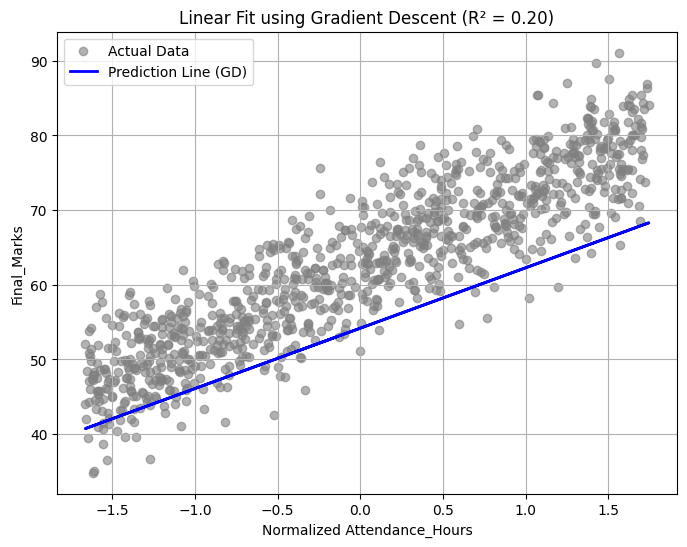

In [61]:
import matplotlib.pyplot as plt

# Predict using final learned parameters
y_pred_final = (w * X + b).flatten()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='gray', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred_final, color='blue', linewidth=2, label='Prediction Line (GD)')
plt.xlabel('Normalized Attendance_Hours')
plt.ylabel('Final_Marks')
plt.title(f'Linear Fit using Gradient Descent (R² = {r2_score(y, y_pred_final):.2f})')
plt.legend()
plt.grid(True)
plt.show()


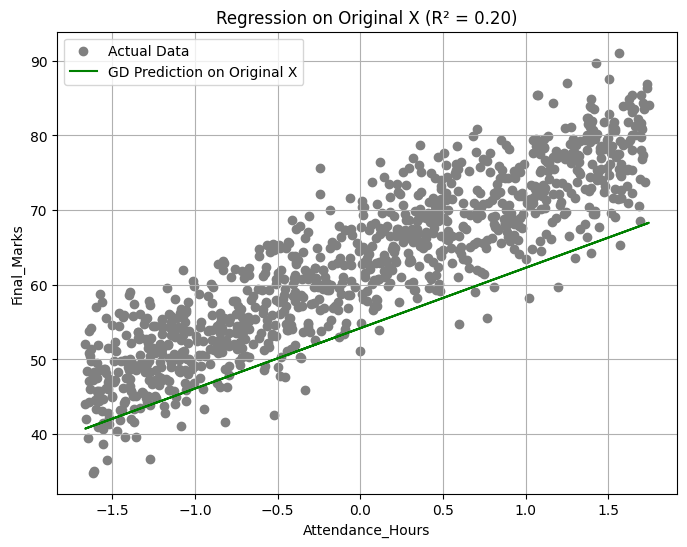

In [63]:
# Store original X before normalization
X_raw = X

# Recalculate predictions using de-normalized formula:
# Reverse normalization: X = (X_raw - mean) / std
# So: w * X + b  --> w * ((X_raw - mean) / std) + b
mean = X_raw.mean()
std = X_raw.std()
y_pred_original_X = w * ((X_raw - mean) / std) + b

# Plot with original X axis
plt.figure(figsize=(8, 6))
plt.scatter(X_raw, y, color='gray', label='Actual Data')
plt.plot(X_raw, y_pred_original_X, color='green', label='GD Prediction on Original X')
plt.xlabel('Attendance_Hours')
plt.ylabel('Final_Marks')
plt.title(f'Regression on Original X (R² = {r2_score(y, y_pred_original_X):.2f})')
plt.legend()
plt.grid(True)
plt.show()


Applying gradient descent for further optimization does not significantly improve the R² score for this dataset. This is because Ridge regression already prevents overfitting and achieves a strong fit. Regularization helps control model complexity, but when the underlying relationship is simple and well-approximated, additional optimization yields similar results.

**Summary:**
- **Ridge regression** (L2 regularization) effectively fits the data and prevents overfitting.
- **Gradient descent** does not further improve the R² score in this case, since the model is already optimal for the given data.
- **Regularization** is most beneficial when there is a risk of overfitting or when the model is too complex for the data.

In conclusion, for this dataset, Ridge regression provides accurate predictions, and additional optimization with gradient descent does not yield significant gains.